<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/dz_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 4. Математика для data sciense. Нетология.

Загрузить датасет из лекции 4, выбрать вектор в двухмерном пространстве на основе данного датасета и построить логистическую регрессию.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))
  
def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

import scipy 
from scipy.optimize import fmin_tnc

def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y.flatten()))
    return opt_weights[0]

def predict(x):
    theta = parameters[:, np.newaxis]
    return probability(theta, x)

def accuracy(x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict(x) >= 
                         probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100

In [3]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
var1 = 'age'
var2 = 'ca'

X = data.loc[:, [var1, var2]]
Y = data.loc[:, ['target']]

In [5]:
new_index= [0, var1, var2]
X = X.reindex(new_index, axis='columns')

In [6]:
X = X.fillna(0)

In [7]:
list_indexes_class0 = Y[Y['target']==0].index.values.tolist()
list_indexes_class1 = Y[Y['target']==1].index.values.tolist()
X0 = X.loc[list_indexes_class0, :]
X1 = X.loc[list_indexes_class1, :]

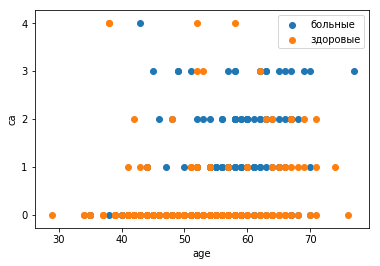

In [8]:
plt.xlabel(var1)
plt.ylabel(var2)

plt.scatter(X0.loc[:, var1], X0.loc[:, var2])
plt.scatter(X1.loc[:, var1], X1.loc[:, var2])
plt.legend(['больные', 'здоровые'])
plt.show()

In [9]:
X = np.array(X)
Y = np.array(Y)
theta = np.zeros((X.shape[1], 1))

## Для начала, будем использовать нашу ф-ю логистической регрессии.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22, shuffle=True)

In [12]:
parameters = fit(X_train, y_train, theta)

In [13]:
parameters

array([ 0.        ,  0.01392891, -0.93192369])

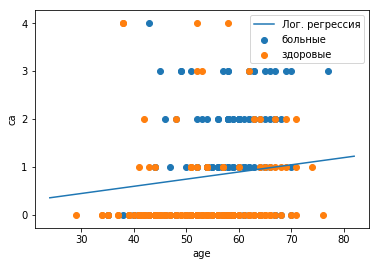

In [14]:
x_values = [np.min(X_train[:, 1] - 5), np.max(X_train[:, 1] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel(var1)
plt.ylabel(var2)

plt.scatter(X0.loc[:, var1], X0.loc[:, var2])
plt.scatter(X1.loc[:, var1], X1.loc[:, var2])
plt.legend(['Лог. регрессия', 'больные', 'здоровые'])

In [15]:
y_test_pred = np.round(predict(X_test), 0)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy(X_test, y_test.flatten())

72.1311475409836

## Теперь сравним с лог. регрессией из библ. sklearn

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\Arsenii\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arsenii\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
y_test_predict = clf.predict(X_test)

In [21]:
accuracy_score(y_test, y_test_predict)

0.7213114754098361

## Видно, что результат практически идентичный.